<div align="center">
    <section>
    <h1>Tarea 1</h>
    <p>Procesamiento de Lenguaje Natural</p>
    <p>Sergio Alberto De León Martínez</p>
</section>

</div>

In [1]:
Nombre = "Sergio Alberto De León Martínez"
Num_tarea = 1

<section>
    <h3> Construcción de un corpus</h3>
</section>

In [8]:
url_drive_conferencias = "https://drive.google.com/drive/folders/18w0X0KFWtbxkAqK0TDMcqZu3f8FCUFyV?usp=sharing"

<section>
    <h3>Vistazo a los datos</h3>
    <p>Utilice funciones básicas de Python para hacer lo siguiente:</p>
<ol>
    <li>Cargue todas las conferencias en un string y aplique la función <code>split</code> para generar tokens fácilmente.</li>
    <li>Contar la cantidad de palabras en todas las conferencias.</li>
    <li>Extraer el vocabulario y mostrar su longitud de todo el corpus.</li>
    <li>Mida la riqueza del vocabulario de alguna forma en todos los documentos.</li>
    <li>Haga lo mismo que los 4 puntos anteriores pero con todo el texto en minúsculas. Vea las diferencias y comente brevemente (sino comentas habrá penalización).</li>
    <li>Haga lo mismo que los puntos 1, 2 y 3 usando el tokenizador RegExp de NLTK, con una expresión regular que trate de sacar solo tokens que pueden contener solo letras mayúsculas y minúsculas. Después cargue los tokens en un objeto Text de NLTK en lugar de una lista de Python.</li>
    <li>Haga todo el texto minúsculas. Haga los mismo que los puntos 1, 2, y 3 usando el
    tokenizador TweetTokenizer ; COMENTE BREVEMENTE DIFERENCIAS. Haga el
    resto de esta tarea asumiendo haber hecho este punto.</li>
</ol>
</section>

In [3]:
# 1
import glob 

corpus_conferencias_presidente = ''
for conferencia in glob.glob("./estenograficas_limpias_por_fecha/*"):
    with open(conferencia, 'r', encoding="utf-8") as archivo:
        corpus_conferencias_presidente += archivo.read()

tokens_conferencias = corpus_conferencias_presidente.split()

In [18]:
# 2
cantidad_palabras = len(tokens_conferencias)
print("Cantidad de palabras en el corpus:", cantidad_palabras)

# 3
vocabulario = set(tokens_conferencias)
cantidad_vocabulario = len(vocabulario)
print("Cantidad de vocabulario en el corpus:", cantidad_vocabulario)

Cantidad de palabras en el corpus: 13988440
Cantidad de vocabulario en el corpus: 233718


<p>Podemos usar el indice de diversidad léxica, pero debido a que el corpus con el que estamos trabajando es muy extenso, este paramétro podría no ser de mucha utilidad, por lo tanto utilizamos otros dos paramétros que se ajustan mejor a textos extensos como lo es, el índice de Herdan y el índice de Guiraud. Para el primero entre más cercano a uno nos indica una mayor riqueza, en este caso obtenemos un valor de 0.75, también mostramos el histograma con algunas palabras más comunes, para esto hicimos un filtrado muy básico para no mostrar sólo palabras vacías.</p>

Índice de diversidad léxica: 0.01670793884092865
Índice de Herdan: 0.7513105933866401
Índice de Guiraud: 62.48956752950178


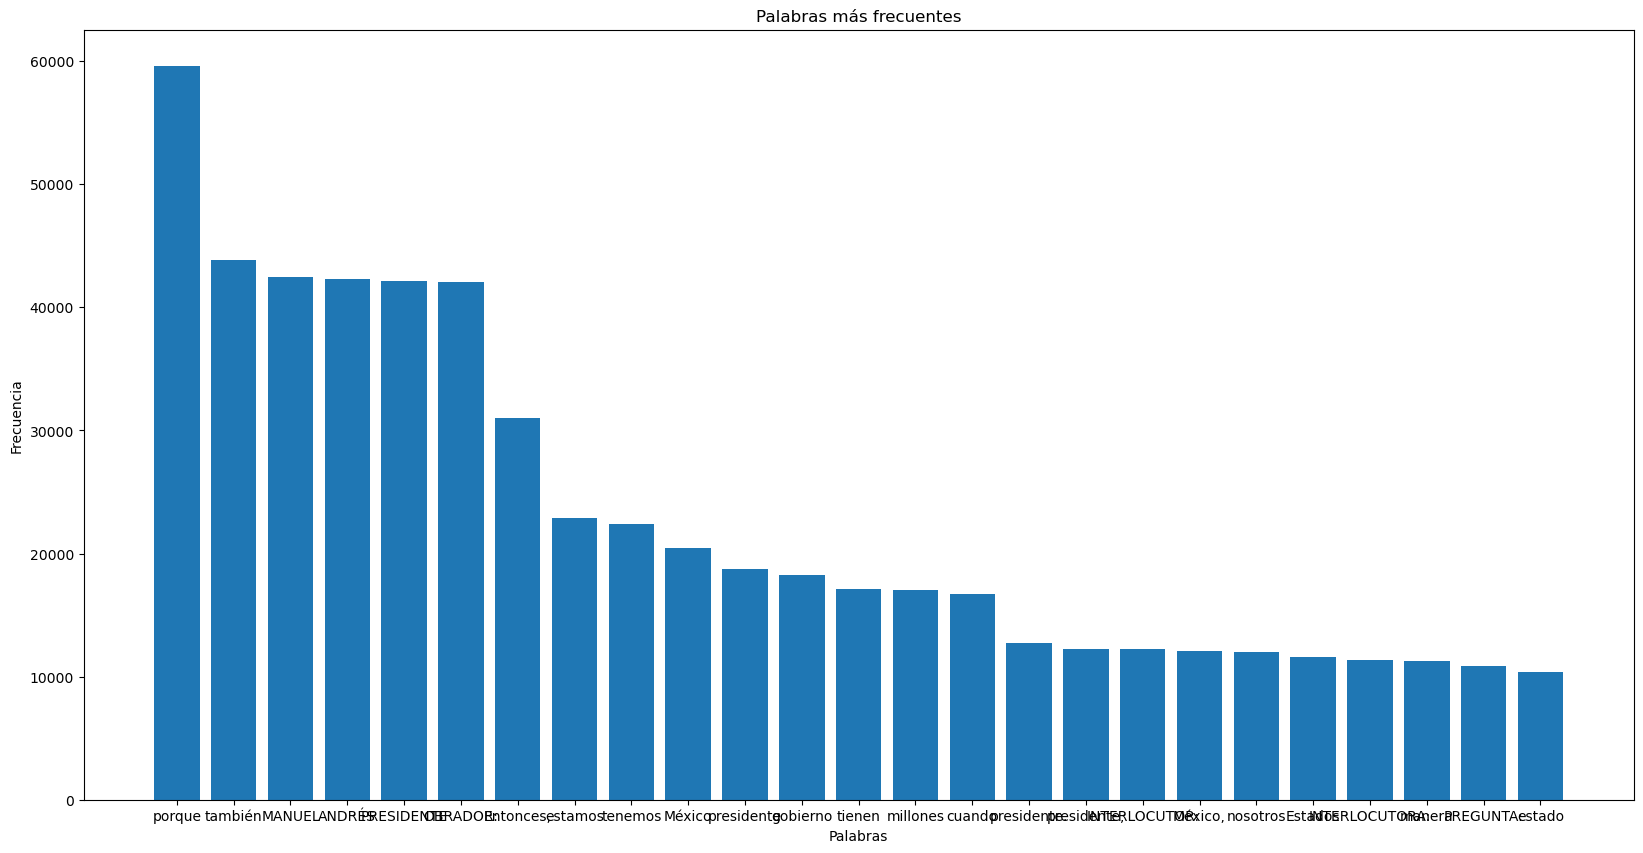

In [68]:
# 4
from collections import Counter
import matplotlib.pyplot as plt 
import numpy as np
# Indice de diversidad lexica (TTR)
TTR = cantidad_vocabulario / cantidad_palabras
print("Índice de diversidad léxica:", TTR)
# Indice de Herdan 
herdan = np.log(cantidad_vocabulario) / np.log(cantidad_palabras)
print("Índice de Herdan:", herdan)
# Indice de Guiraud 
guiraud = cantidad_vocabulario / np.sqrt(cantidad_palabras)
print("Índice de Guiraud:", guiraud)

# Histograma de palabras mas frecuentes 
palabras_largas = [palabra for palabra in tokens_conferencias if len(palabra) > 5]
frecuencia_palabras = Counter(palabras_largas)
num_palabras_mas_frecuentes = 25
palabras_mas_frecuentes = frecuencia_palabras.most_common(num_palabras_mas_frecuentes)
palabras = [tupla[0] for tupla in palabras_mas_frecuentes]
frecuencias = [tupla[1] for tupla in palabras_mas_frecuentes]

plt.figure(figsize=(20, 10))
plt.bar(palabras, frecuencias)
plt.title("Palabras más frecuentes")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.show()

In [37]:
# 5 
# Convertir a minusculas 
corpus_conferencias_presidente_minusculas = corpus_conferencias_presidente.lower()
# Tokenizar corpus en minusculas 
tokens_conferencias_minusculas = corpus_conferencias_presidente_minusculas.split()
# Contar palabras 
cantidad_palabras_minusculas = len(tokens_conferencias_minusculas)
print("Cantidad de palabras minusculas", cantidad_palabras_minusculas)
# Extraer vocabulatio 
vocabulario_minusculas = set(tokens_conferencias_minusculas)
cantidad_vocabulario_minusculas = len(vocabulario_minusculas)
print("Vocabulario minusculas", cantidad_vocabulario_minusculas)
# Medir riqueza 
TTR_minusculas = cantidad_vocabulario_minusculas / cantidad_palabras_minusculas
print("Índice de diversidad léxica", TTR_minusculas)
gerdan_minusculas = np.log(cantidad_vocabulario_minusculas) / np.log(cantidad_palabras_minusculas)
print("Índice de Gerdan", gerdan_minusculas)
guiraud_minusculas = cantidad_vocabulario_minusculas / np.sqrt(cantidad_palabras_minusculas)
print("Índice de Guiraud", guiraud_minusculas)

razon_vocabulario = cantidad_vocabulario / cantidad_vocabulario_minusculas
print("Razón entre vocabulario y vocabulario en minusculas", razon_vocabulario)

Cantidad de palabras minusculas 13988440
Vocabulario minusculas 214392
Índice de diversidad léxica 0.01532636948794862
Índice de Gerdan 0.7460650300239612
Índice de Guiraud 57.32234300218616
Razón entre vocabulario y vocabulario en minusculas 1.0901432889286913


<p>En este ejercicio podemos ver que los paramétros que usamos previamente para mediar la diversidad léxica cambiaron, en todos mostrando un decremento, esto se podria deber a que el script que usamos anteriormente identifica dos palabras como diferentes aún si solo la letra con la que empizan esta en mayúsculas.<p>

In [12]:
# 6 
# Tokenizar 
import nltk as nltk
patron = r'''(?x)                         # Flag para permitir verbose regexps
              (?:[A-Z]\.)+                # Abreviaciones, ej: U.S.A.
              | [^\W\d_]+(?:-[^\W\d_]+)*  # Palabras con guión interno, excluyendo dígitos
              # Separar (pero no capturar) elipsis
              | (?<=\.\.\.)[^\W\d_]       # Palabras precedidas por elipsis, excluyendo dígitos
              | [^\W\d_]+(?=\.\.\.)       # Palabras seguidas por elipsis, excluyendo dígitos
              # Separar (pero no capturar) caracteres especiales
              | (?<=[].,"';?():-_`])[^\W\d_]    # Palabras precedidas por caracteres especiales, excluyendo dígitos
              | [^\W\d_]+(?=[].,"';?():-_`])    # Palabras seguidas por caracteres especiales, excluyendo dígitos
'''


tokens_nltk = nltk.regexp_tokenize(corpus_conferencias_presidente.lower(), patron)
print("Primeros 50 tokens con expresiones regulares", tokens_nltk[:50])
# Cantida de palabras 
cantidad_palabras_nltk = len(tokens_nltk)
print("Cantidad de palabras usando NLTK", cantidad_palabras_nltk)
# Extraer vocabulario 
vocabulario_nltk = set(tokens_nltk)
cantidad_vocabulario_nltk = len(vocabulario_nltk)
print("Cantidad de vocabulario usando NLTK", cantidad_vocabulario_nltk)

Primeros 50 tokens con expresiones regulares ['versión', 'estenográfica', 'de', 'la', 'conferencia', 'de', 'prensa', 'matutina', 'del', 'presidente', 'andrés', 'manuel', 'lópez', 'obrador', 'desde', 'baja', 'california', 'sur', 'presidente', 'de', 'méxico', 'warning', 'invalid', 'argument', 'supplied', 'for', 'foreach', 'in', 'var', 'www', 'html', 'wordpress', 'wp-content', 'themes', 'diplomat', 'header-socials', 'php', 'on', 'line', 'inicio', 'sala', 'de', 'prensa', 'boletines', 'transcripciones', 'documentos', 'fotogalería', 'fotogalerías', 'reuniones', 'estatales']
Cantidad de palabras usando NLTK 13808419
Cantidad de vocabulario usando NLTK 85104


In [13]:
from nltk.text import Text

texto_corpus_conferencias = Text(tokens_nltk)

In [4]:
# 7
# Tokenizar 
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()

tokens_tweet = tknzr.tokenize(corpus_conferencias_presidente.lower())

# Contar palabras 
cantidad_palabras_tweet = len(tokens_tweet)
print("Cantidad de palabras con TweetTokenizer", cantidad_palabras_tweet)
# Contar vocabulario 
cantidad_vocabulario_tweet = len(set(tokens_tweet))
print("Cantidad de vocabulario con TweetTokenizer", cantidad_vocabulario_tweet)
print("Primeros 50 tokens usando TweetTokenizador", tokens_tweet[:50])


Cantidad de palabras con TweetTokenizer 16259161
Cantidad de vocabulario con TweetTokenizer 91353
Primeros 50 tokens usando TweetTokenizador ['28.10', '.', '22', 'versión', 'estenográfica', 'de', 'la', 'conferencia', 'de', 'prensa', 'matutina', 'del', 'presidente', 'andrés', 'manuel', 'lópez', 'obrador', ',', 'desde', 'baja', 'california', 'sur', '–', 'presidente', 'de', 'méxico', 'warning', ':', 'invalid', 'argument', 'supplied', 'for', 'foreach', '(', ')', 'in', '/', 'var', '/', 'www', '/', 'html', '/', 'wordpress', '/', 'wp-content', '/', 'themes', '/', 'diplomat']


<p> Vemos que TweetTokenizer toma como tokens ciertos caracteres especiales como puntos, comas, guines étc, esto se debe a que este tokenizador esta espcializado en detectar tokens que uno podría esperar en textos provenientes de redes sociales.</p>

<section>
    <h3>Funciones NLTK</h3>
    <ol>
    <li>Use la función <code>concordance</code> para ver el contexto de 5 palabras que usted elija.</li>
    <li>Elija una palabra que le parezca interesante y muestre palabras con uso similar. Muestre también los contextos comunes. <strong>COMENTE</strong> al respecto.</li>
    <li>Haciendo uso de alguna librería <code>time</code> de Python: organice todos los archivos de las conferencias desde la más antigua hasta la más nueva (echando mano del nombre del archivo y fechas), y cárguelos en un objeto <code>Text</code> para generar un <em>dispersion plot</em> de las siguientes palabras: <code>prian</code>, <code>corrupción</code>, <code>mafia</code>, <code>narco</code>, <code>gasolina</code>, <code>pipas</code>, <code>conacyt</code>, <code>conahcyt</code>, <code>ciencia</code>, <code>turismo</code>, <code>pandemia</code>, <code>coronavirus</code>, <code>covid</code>, <code>delta</code>, <code>omicron</code>, <code>vacuna</code>, <code>vacunacion</code> y otras cinco palabras de su elección.</li>
    <li>Muestre 50 colocaciones de todo el corpus.</li>
    <li>Muestre un histograma de longitud en caracteres de las palabras. Muestre en el histograma el top 5 de longitudes más largas.</li>
    <li>Muestre 50 palabras con longitud mayor a 8 caracteres y frecuencia mayor a 5 en todo el texto usando <em>comprenhension list</em> de python.</li>
    <li>Ver <a href="https://www.nltk.org/book/ch02.html">https://www.nltk.org/book/ch02.html</a> en la sección 1.5. Proponga una gráfica usando <code>ConditionalFreqDist</code> como la de la Sección 1.5 para estos datos. Usted elige las palabras.</li>
    <li>Use la lista de <em>stopwords</em> de nltk y obtenga la cantidad de palabras en los datos con y sin <em>stopword</em>. Comente brevemente las diferencias.</li>
    <li>Muestre las 300 palabras más frecuentes en las conferencias, sin tomar en cuenta <em>stopwords</em>. Muéstrelas de la más frecuente a la menos frecuente.</li>
</ol>
</section>

In [14]:
# 1
# Cargamos la tokenizacion del corpus de las conferencias en un objeto tipo texto 
texto_corpus_conferencias_tt = Text(tokens_tweet)
palabra_1 = texto_corpus_conferencias_tt.concordance("Aeropuerto")
palabra_2 = texto_corpus_conferencias_tt.concordance("Tren Maya")
palabra_3 = texto_corpus_conferencias_tt.concordance("manifestación")
palabra_4 = texto_corpus_conferencias_tt.concordance("independencia")
palabra_5 = texto_corpus_conferencias_tt.concordance("economía")

Displaying 25 of 4366 matches:
sados antes que él fue llevado al aeropuerto de méxico y su familia se enteró 
a la calidad de los servicios del aeropuerto internacional ‘ ángel albino corz
í de otras cosas , el tren maya , aeropuerto , el istmo , y un día les vamos a
 del año próximo . es como lo del aeropuerto ‘ felipe ángeles ’ , nada más que
e ángeles ’ , nada más que con el aeropuerto se logró hacerlo en poco tiempo p
ara la operación . en el caso del aeropuerto ‘ felipe ángeles ’ , ¿ se acuerda
 central avionera ’ . es el mejor aeropuerto de américa latina , nada más que 
utos de distintos puntos al nuevo aeropuerto , y va a seguir creciendo y creci
ac mool y mejorar el distribuidor aeropuerto . presidente andrés manuel lópez 
 del norte . estamos ampliando el aeropuerto de tepic . con decirles que no ha
ban más el museo del mamut que el aeropuerto , o sea , todo eso , todo y más .
s ferrocarriles ; pero también el aeropuerto ha ido aumentando en el número de
os íbamos a meter con

In [63]:
# 2
palabra_interesante = "inflación"
texto_corpus_conferencias_tt.similar(palabra_interesante)

corrupción información violencia que justicia seguridad salud gente
investigación democracia población vida pandemia y deuda producción
inversión atención economía impunidad


In [64]:
texto_corpus_conferencias_tt.concordance(palabra_interesante)

Displaying 25 of 1646 matches:
sobre los aumentos de precio . hay inflación , por ejemplo , en el mundo , pero
s de dólares . por eso tenemos una inflación de 8.5 . si no se entregara ese su
 no se entregara ese subsidio , la inflación sería del 14 por ciento . nosotros
 . nosotros llegamos a tener menos inflación que estados unidos y mucho menos i
n que estados unidos y mucho menos inflación que europa , entonces todo eso ayu
o llegaron a darse por abajo de la inflación . todo eso eran recomendaciones de
ecto que esto pueda traer sobre la inflación en nuestro país de nueva cuenta . 
ata , porque necesitamos cuidar la inflación , y estoy notando de que hay presi
 . ¿ cómo nos explicamos de que la inflación en los tres segmentos nos pega más
mos en energéticos , tenemos menos inflación que estados unidos y que europa , 
os nos ganan , porque tienen menos inflación en alimentos . algo está sucediend
ahora , que hay que cuidar , es la inflación , el que no haya incremento . pero
pasajero 

<p>Me llama la atención que algunas palabras similares a inflación o que aparecen en contextos comunes son deuda, corrupción, pandemia y deuda, lo cuál nos habla del enfoque que se le da a este fenómeno</p>

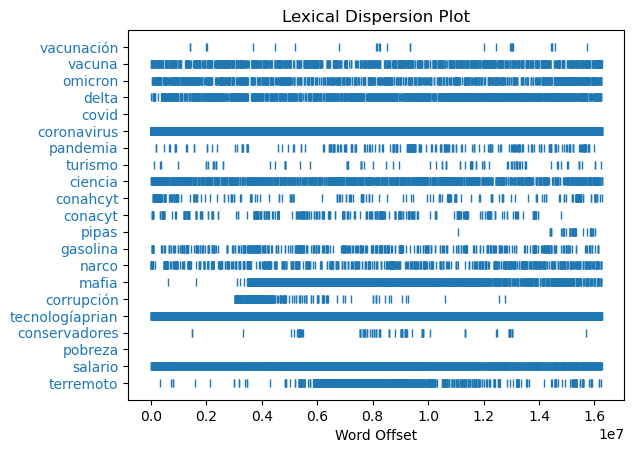

In [25]:
# 3 
# Las palabras extras que elegí fueron: terremoto, salario, probreza, 
# conservadores, tecnología 
import os 
from datetime import datetime

dir = './estenograficas_limpias_por_fecha'
# Lista de todos los archivos en el directorio
archivos = os.listdir(dir)
# Filtrar archivos que no cumplan con el formato de fecha 
archivos_con_fecha = [archivo for archivo in archivos if len(archivo.split('-')) == 3]
# Ordenar archivos
archivos_ordenados = sorted(archivos_con_fecha, key=lambda x: datetime.strptime(x[:10], '%Y-%m-%d')) 
# Construir el corpus para dispersion plot 
corpus_dispersion = ''
for conferencia in archivos_ordenados:
    with open('./estenograficas_limpias_por_fecha/' + conferencia, 'r', encoding="utf-8") as archivo:
        corpus_dispersion += archivo.read()


texto_corpus_dispersion = Text(tknzr.tokenize(corpus_dispersion.lower()))
palabras = [
    "terremoto", "salario", "pobreza", "conservadores", "tecnología"
    "prian", "corrupción", "mafia", "narco", "gasolina", "pipas", 
    "conacyt", "conahcyt", "ciencia", "turismo", "pandemia", 
    "coronavirus", "covid", "delta", "omicron", "vacuna", "vacunación"
]
texto_corpus_dispersion.dispersion_plot(palabras)

In [28]:
# 4
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import stopwords

# Limpiamos primero el texto 
stop_words = set(stopwords.words('spanish'))
tokens = [token for token in tokens_tweet if token.isalnum() and token not in stop_words]
# Encontramos colocaciones 
bigramas_buscador = BigramCollocationFinder.from_words(tokens)
medida = BigramAssocMeasures.likelihood_ratio
colocaciones = bigramas_buscador.nbest(medida, 50)
print("Top 50 colocaciones:", colocaciones)

Top 50 colocaciones: [('lópez', 'obrador'), ('andrés', 'manuel'), ('manuel', 'lópez'), ('presidente', 'andrés'), ('buenos', 'días'), ('versión', 'estenográfica'), ('señor', 'presidente'), ('conferencia', 'prensa'), ('prensa', 'matutina'), ('tren', 'maya'), ('estenográfica', 'conferencia'), ('millones', 'pesos'), ('guardia', 'nacional'), ('ciudad', 'méxico'), ('muchas', 'gracias'), ('adultos', 'mayores'), ('covid', '19'), ('derechos', 'humanos'), ('quintana', 'roo'), ('redes', 'sociales'), ('baja', 'california'), ('mil', 'millones'), ('ramírez', 'cuevas'), ('marcelo', 'ebrard'), ('matutina', 'presidente'), ('jesús', 'ramírez'), ('poder', 'judicial'), ('benito', 'juárez'), ('gracias', 'presidente'), ('garcía', 'luna'), ('sembrando', 'vida'), ('federal', 'electricidad'), ('secretaría', 'defensa'), ('construyendo', 'futuro'), ('comisión', 'federal'), ('5093', '4900'), ('argument', 'supplied'), ('documentosdocumentos', 'gabinetegabinete'), ('fotogalería', 'fotogalerías'), ('html', 'wordpres

Text(0, 0.5, 'Cantidad de palabras con tal longitud')

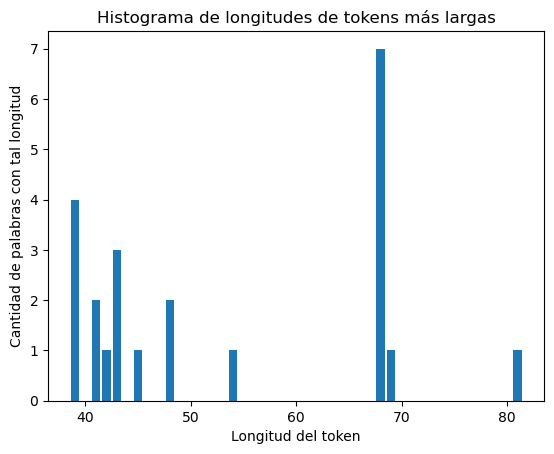

In [79]:
# 5 
longitudes_palabras = {} # {longitud: numero de palabras con esa longitud}
for token in set(tokens_tweet):
    longitud = len(token)
    if longitud in longitudes_palabras:
        longitudes_palabras[longitud] += 1
    else:
        longitudes_palabras[longitud] = 1

longitudes_ordenadas = sorted(longitudes_palabras.items(), reverse=True)
top_longitudes = longitudes_ordenadas[:10]
longitudes = [longitud for (longitud, frecuencia) in top_longitudes]
frecuencias = [frecuencia for (longitud, frecuencia) in top_longitudes]
plt.bar(longitudes, frecuencias)
plt.title("Histograma de longitudes de tokens más largas")
plt.xlabel("Longitud del token")
plt.ylabel("Cantidad de palabras con tal longitud")



In [15]:
# 6
import nltk
fdist = nltk.FreqDist(texto_corpus_conferencias_tt)
palabras_intersantes = [palabra for palabra in set(tokens_tweet) if len(palabra) > 8 and fdist[palabra] > 5]
top_palabras_interesante = palabras_intersantes[:50]
print("50 palabras con longitud mayor a 8 y que aparecen más de 5 veces:", top_palabras_interesante)
print("Número total de palabras con longitud mayor a 8 y que aparecen más de 5 veces:", len(palabras_intersantes))

50 palabras con longitud mayor a 8 y que aparecen más de 5 veces: ['mestizaje', 'superissste', 'clasificado', 'cumplimentar', 'explicarles', 'interesada', 'correctos', 'calumniar', 'hidroxicloroquina', 'generador', 'educarlos', 'fraudulenta', 'fresnillo', 'telesecundarias', 'propuestas', 'eufemismo', 'informaré', 'insuficiencia', 'alcohólicas', 'chilpancingo', 'grillotina', 'radicalmente', 'rancherías', 'notariado', 'competitivos', 'coincidente', 'bitácoras', 'cubiertas', 'aeronavegabilidad', 'vinculada', 'seguirlas', 'telecomunicación', 'identificaba', 'concentran', 'restringir', 'degradación', 'esterilidad', 'destilación', 'controlar', 'artísticos', 'destituyen', 'acompañamos', 'interpretado', 'analfabetas', 'tergiversar', 'solicitaron', 'degenerativas', 'renglones', 'politizados', 'preparada']
Número total de palabras con longitud mayor a 8 y que aparecen más de 5 veces: 15911


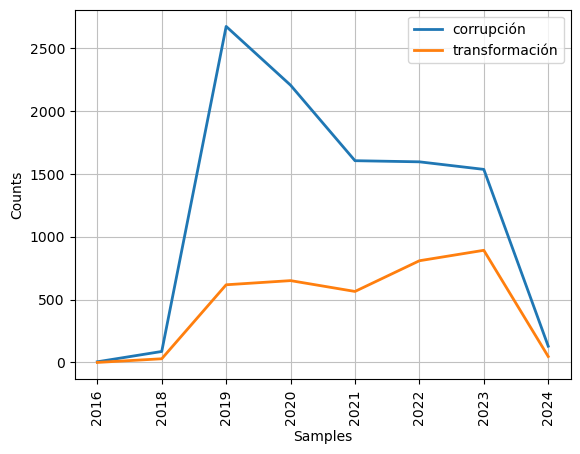

<Axes: xlabel='Samples', ylabel='Counts'>

In [110]:
# 7 
# Frecuencia de las palabras "corrupción" y "trasnformación" a lo largo de los años que ha durado el sexenio 
from nltk.corpus.reader.plaintext import CategorizedPlaintextCorpusReader

# Crearmos una instancia del CategorizedPlaintextCorpusReader
# Utilizamos los primeros 4 caracteres del nombre del archivo (el año) como categoría
corpus_mañaneras = CategorizedPlaintextCorpusReader(
    root='./estenograficas_limpias_por_fecha', 
    fileids=r'.*',          # Regex para especificar los archivos a incluir
    cat_pattern=r'(\d{4})-.*'    # Regex para extraer el año del nombre del archivo
)

cfd = nltk.ConditionalFreqDist(
          (target, fileid[:4])
          for fileid in corpus_mañaneras.fileids()
          for w in corpus_mañaneras.words(fileid)
          for target in ['corrupción', 'transformación']
          if w.lower().startswith(target))

cfd.plot()



<p>Para este ejercicio decidí utilizar las palabras 'corrupción' y 'transformación' y ver la frecuencia de aparición de estas a lo largo del sexenio. De la gráfica se puede apreciar que 'corrupción' fue un termino muy usado durante el 2019, investigando un poco pude encontrar que en este año hubo casos muy famosos de corrupción en el gobierno, esto podría ser el principal motivo, por otro lado 'transformación' parece tener una aparición más homogénea a lo largo del sexenio, por último cabe resaltar que tanto en los años 2016, 2018 y 2024 hay muy pocos archivos, es por esto que es natural ver un decremento considerable de la frecuencia de estas palabras.
</p>

In [6]:
# 8
from nltk.corpus import stopwords

stop_words = sorted(set(stopwords.words('spanish')))
print("Algunas palabras contenidas en stop_words", stop_words[:10])

tokens_no_vacios = [token for token in tokens_tweet if token.lower() not in stop_words]
print("Algunas palabras no vacías dentro del corpus de las mañaneras", tokens_no_vacios[:10])

print("Cantidad de tokens sin utilizar stop_words", len(tokens_tweet))
print("Cantidad de tokens utilizando stop_words", len(tokens_no_vacios))

Algunas palabras contenidas en stop_words ['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra']
Algunas palabras no vacías dentro del corpues de las mañaneras ['28.10', '.', '22', 'versión', 'estenográfica', 'conferencia', 'prensa', 'matutina', 'presidente', 'andrés']
Cantidad de tokens sin utilizar stop_words 16259161
Cantidad de tokens utilizando stop_words 9164251


<p>Claramente hay muchos más tokens cuando no utilizamos stop_words que cuando si lo usamos, esto es porque previamente en stop_words ya se han cnosiderado palabras relacionadas con la estructura del lenguaje pero que no tiene relevancia semántica dentro del corpus.</p>

In [29]:
# 9 
print("300 palabras más frecuentes en las conferencias sin utilizar stop_words", fdist.most_common(300))

300 palabras más frecuentes en las conferencias sin utilizar stop_words [(',', 1290783), ('de', 791017), ('.', 542775), ('que', 531982), ('la', 442977), ('y', 366668), ('a', 359800), ('el', 359465), ('en', 354092), ('se', 240731), ('los', 205522), ('no', 196990), ('es', 185100), ('lo', 133735), ('con', 131184), ('del', 130091), (':', 125590), ('por', 121705), ('para', 119847), ('un', 119118), ('las', 111710), ('presidente', 96336), ('una', 93477), ('ya', 78156), ('pero', 68104), ('porque', 67436), ('¿', 66257), ('?', 66113), ('más', 64927), ('al', 62010), ('como', 57371), ('hay', 56667), ('también', 54307), ('lópez', 51696), ('manuel', 50741), ('obrador', 50436), ('andrés', 50030), ('eso', 49899), ('está', 49828), ('este', 49025), ('si', 47437), ('o', 47320), ('entonces', 43292), ('vamos', 40676), ('va', 40479), ('méxico', 40227), ('muy', 39997), (';', 39790), ('nos', 38671), ('mil', 38561), ('todo', 38033), ('sí', 37474), ('su', 37214), ('son', 36592), ('esto', 33222), ('esta', 33106)

<p>Al no estar usando "stop_words" se puede ver que las palabras más comúnes corresponen a artículos, conectores étc.</p>

<section>
    <h3>Otras librerías en Python</h3>
    <ol>
        <li>Mencione dos librerías en Python además de NLTK para NLP. Ponga una desventaja y ventaja de cada una.</li>
        <li>Mencione tres alternativas para Text Processing en NLP qué existen en otros lenguajes. De una ventaja y desventaja de cada una.</li>
    </ol>
</section>

<section>
    <h3>spaCy</h3>
    <p>Esta es una librería que resulta ser muy eficiente para escalar el procesamiento de lenguaje natural, cuenta con varios modelos pre-entrenados, la desventaja es que puede llegar a ser poco felxible la personalización, especialmente si se requiere para tareas muy especializadas.</p>
</section>

<section>
    <h3>Transformers</h3>
    <p>Esta librería fue desarrollada por Hugging Face y cuenta con modelos pre-entrenados basados en arquitecturas modernas y populares como BERT y GPT-2, la desventaja es que puede llegar a consumir muchos recursos computacionales y tiempo de ejecución, especialmente si no se cuenta con el hardware adecuado.</p>
</section>

<section>
    <h3>StanfordCoreNLP(Java)</h3>
    <p>Ofrece muchas herramientas de análisis lingüístico y es conocido por su robustez, pero puede llegar a ser difícil de configurar en comparación con Pythono.</p>
    <h3>ApacheOpenNLP(Java</h3>
    <p>Se integra bien con el ecosistema de Apache, pero al no ser una comunidad tan activa como otras, hay menos actualizaciones y características nuevas.</p>
</section>

<section>
    <h3>Natural(JavaScript)</h3>
    <p>Quizás la principal ventaja es que permie integrar capacidades de NLP en aplicaciones web de forma directa, pero adolece de no ser tan avanzado como NLTK en Python y podría no ser adecuado para escalar tareas complejas.</p>
</section>